In [1]:
#librerie
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from google.colab import drive
from scipy import integrate
from time import sleep
from scipy.optimize import curve_fit

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_to_file="drive/MyDrive/Lab HPGE/Data/Ge_Ba133_2000_g100_3.xml"  #change this 



tree = ET.parse(path_to_file) 
root=tree.getroot()

In [ ]:
list=[]

#output of the code below: a list of events and each event is a list of 8192 samples  

for event in root.findall("event"):  #this finds all the event in the file
    string_event=event.find("trace").text  #this takes all the samples for each event
    int_event=[int(string_number) for string_number in string_event.split()] #splitting and casting to int
    list.append(int_event)    

  
sample_space=10e-9 #10 ns
samples_per_event=len(list[0]) # 8192

evento=75 #pick an event to plot below

time_axis=np.linspace(sample_space,samples_per_event*sample_space,samples_per_event)  # from 10 ns to 8192*10 ns 
samples_axis=np.linspace(1,len(list[evento]),num=len(list[evento])) # from 1 to 8192 

list_event=np.array(list) # casting to a numpy array

In [ ]:
saturation_point=16383 #limit points saturation

#find the maximum of each event
maxima_peaks=np.zeros(len(list))
list_event.max(axis=1,out=maxima_peaks)

#find the index of each event that has a saturation problem
index_saturated=[i for i in range(len(maxima_peaks)) if(maxima_peaks[i]==saturation_point)]

print("There are ",len(index_saturated), "events in this run.")

There are  1660 events in this run.


In [ ]:
def gaussian(x, N, mu,sigma):
    return N * np.exp(-0.5*((x-mu)/sigma)**2)

flag=1 #if 0 the saturated events will be overwritten in the same array, otherwise saturated events will be filled 

threshold_value=50 #select a portion of the event that has a signal discarding samples below the threshold level
saturated_events_fitted=np.zeros((len(list_event),len(list_event[0]))) 

for index_event in index_saturated: #cycle on saturated events
    event=list_event[index_event] #select the event 
    sx=[]
    dx=[]
    graph_sx=[]
    graph_dx=[]
    small_points_dx=[]
    small_points_sx=[]
    plateau_points=[]

    plateau_points=[i for i in range(len(event)) if(event[i]==saturation_point)] #range of x_points where the plateau is located

    len_Plateau=len(plateau_points)


    small_points_sx=[i for i in range(len(event)) if(event[i]<threshold_value and i<plateau_points[0])]
    sx=[i for i in range(plateau_points[0]) if(event[i]>=threshold_value and event[i]<saturation_point)]
    dx=[i for i in range(plateau_points[0],len(event)) if(event[i]>=threshold_value and event[i]<saturation_point)]
    graph_sx=[event[i] for i in range(plateau_points[0]) if(event[i]>=threshold_value and event[i]<saturation_point)]
    graph_dx=[event[i] for i in range(plateau_points[0],len(event)) if(event[i]>=threshold_value and event[i]<saturation_point)]
    small_points_dx=[i for i in range(len(event)) if(event[i]<threshold_value and i>plateau_points[0])]

    #filling the right arrays
    x_graph=np.zeros(len(sx)+len(dx))
    np.concatenate((sx,dx),out=x_graph)
    graph=np.zeros(len(graph_sx)+len(graph_dx))
    np.concatenate((graph_sx,graph_dx),out=graph)

    #fitting 
    init_vals = [saturation_point,plateau_points[int(len(plateau_points)/2)] ,len(plateau_points)]  # for [N,mu, wid]
    best_vals, covar = curve_fit(gaussian, x_graph, graph,p0=init_vals) 

    gaussian_event=gaussian(samples_axis,best_vals[0],best_vals[1],best_vals[2])

    #filling the final array:
    if(flag==0):
        list_event[index_event]=gaussian_event
    else:
        saturated_events_fitted[index_event]=gaussian_event

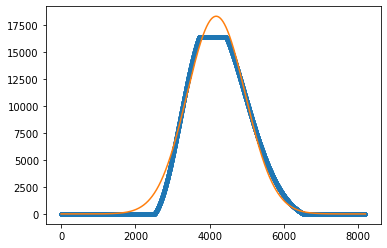

In [ ]:
numb_event=index_saturated[44]
plt.plot(samples_axis,list_event[numb_event],ls="",marker=".")
plt.plot(samples_axis,saturated_events_fitted[numb_event])

In [ ]:
values_integrals=[integrate.trapz(event,time_axis) for event in list_event] #evaluating the spectrum

In [ ]:
np.savetxt("Ge_Ba133_2000_g100_3.txt",values_integrals)

In [ ]:
#Unione file txt a due a due

#unisce i due txt e lo salva in un uno nuovo
#1 e 2 in tot
f= open('Ge_Ba133_2000_g100_1.txt', 'r')
f2=open('Ge_Ba133_2000_g100_2.txt', 'r')
fnuovo=open('Ge_Ba133_2000_g100_tot.txt', 'a')
testo1=f.read()
testo2=f2.read()
fnuovo.write(testo1)
fnuovo.write(testo2)
f.close()
f2.close()
fnuovo.close()


#aggiunge il txt a quello che c'è già

#3 in tot
f= open('Ge_Ba133_2000_g100_tot.txt', 'a')
f2=open('Ge_Ba133_2000_g100_3.txt', 'r')
testo=f2.read()
f.write(testo)
f2.close()
f.close()

#4 in tot
f= open('Ge_Ba133_2000_g100_tot.txt', 'a')
f2=open('Ge_Ba133_2000_g100_4.txt', 'r')
testo=f2.read()
f.write(testo)
f2.close()
f.close()

#5 in tot
f= open('Ge_Ba133_2000_g100_tot.txt', 'a')
f2=open('Ge_Ba133_2000_g100_5.txt', 'r')
testo=f2.read()
f.write(testo)
f2.close()
f.close()

#6 in tot
f= open('Ge_Ba133_2000_g100_tot.txt', 'a')
f2=open('Ge_Ba133_2000_g100_6.txt', 'r')
testo=f2.read()
f.write(testo)
f2.close()
f.close()

In [17]:
nomefile="/content/drive/MyDrive/Lab HPGE/Data/Spectrum_Ge_Ba133_2000_g100_tot_timeaxis.txt" 
#/content/drive/MyDrive/Lab HPGE/Data/Spectrum_Ge_Ba133_2000_g100_tot_sampleaxis.txt
f=open(nomefile,"r")
lines=f.readlines() #leggo linee del file
colonna1=[]
for riga in lines:
    colonna1.append(riga.split()[0])
f.close()

all_integrals_values = np.asarray(colonna1, dtype=np.float64)

In [18]:
len(all_integrals_values)

63540

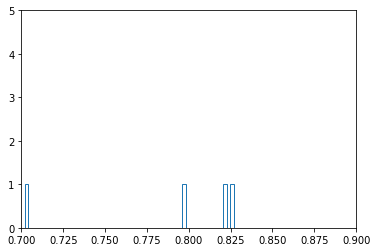

In [30]:
#histogram of the spectrum for all data of Barium

numb_bins=400  #try to change this maybe

plt.hist(all_integrals_values,bins=numb_bins,histtype="step")
plt.ylim(0,5)   #to cut the y axis 
plt.xlim(0.7,0.9)
#plt.yscale("log")
plt.show()

Calibrazione dello spettro

In [ ]:
#TABELLE Ba133

In [ ]:
#Gammas from 133Ba (10.51 y 5)

# Eg (keV)    Ig (%)    Decay mode

# 53.161 1 	  2.199 22 	    e ###
# 79.6139 26 	2.62 6 	      e 
# 80.9971 14 	34.06 27 	    e ###
# 160.613 8 	0.645 8 	    e 
# 223.234 12 	0.450 4 	    e 
# 276.398 2 	7.164 22 	    e ###
# 302.853 1 	18.33 6 	    e #
# 356.017 2 	62.05 19 	    e ###
# 383.851 3 	8.94 3 	      e #

In [ ]:
# X-rays from 133Ba (10.51 y 5)
# E (keV)   	I (%)    	Assignment
# 3,795  	0.24 3  	Cs Ll
# 4,142  	0.110 11  	Cs Lh
# 4,272  	0.66 8  	Cs La2
# 4,286  	6.0 7  	Cs La1
# 4,620  	3.8 4  	Cs Lb1
# 4,649  	0.56 11  	Cs Lb4
# 4,717  	0.93 19  	Cs Lb3
# 4,781  	0.048 6  	Cs Lb6
# 4,934  	1.19 14  	Cs Lb2
# 5,281  	0.54 6  	Cs Lg1
# 5,542  	0.15 3  	Cs Lg2
# 5,553  	0.22 5  	Cs Lg3
# 30,270  0.00401 14  Cs Ka3
# 30,625  	34.9 9  	Cs Ka2
# 30,973  	64.5 17  	Cs Ka1 ###
# 34,920  	5.99 16  	Cs Kb3
# 34,987  	11.6 3  	Cs Kb1
# 35,252  	0.123 5  	Cs Kb5
# 35,818  	3.58 9  	Cs Kb2
# 35,907  	0.74 3  	Cs Kb4

In [ ]:
#picchi più alti per Ba133 estrapolati dalle tabelle

E_real_peaks=[30.973,53.161,80.9971,276.398,302.85,356.017,383.851] #keV
E_real_peaks=np.array(E_real_peaks)

#stima spacca e pesa dal grafico -->incertezza notevole

x_uncalibrated_peaks=[0.05,0.1,0.16,0.45,0.46,0.48,0.492] #scala non calibrata
x_uncalibrated_peaks=np.array(x_uncalibrated_peaks)

749.0964194398598 -22.538893059145956


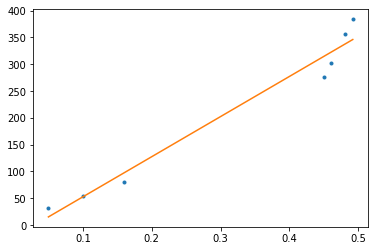

In [ ]:
def linear(x, m, q):
  return m*x+q

#fitting 
init_vals = [1000,20]  # for [N,mu, wid]
best_vals, covar = curve_fit(linear, x_uncalibrated_peaks, E_real_peaks,p0=init_vals) 


plt.plot(x_uncalibrated_peaks,E_real_peaks,ls="",marker=".")
plt.plot(x_uncalibrated_peaks,linear(x_uncalibrated_peaks,best_vals[0],best_vals[1]))
print(best_vals[0],best_vals[1])